In [41]:
!pip install pandas openpyxl

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [10]:
file_path = 'C:\\Users\\Admin\\Documents\\Random0/Datasets/survey_dataset.xlsx'  
df = pd.read_excel(file_path)

  Core Skill Coverage  Count  Percentage (%)
0                 Yes     55           45.08
1           Partially     38           31.15
2                  No     29           23.77


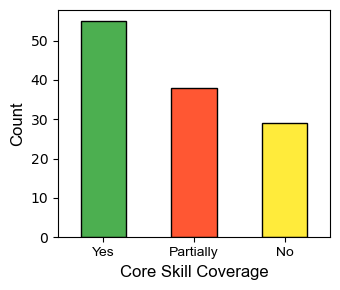

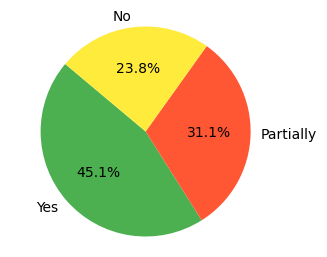

In [37]:
df.columns = df.columns.str.strip()

core_skills_counts = df['core emerging skill covered?'].value_counts()
core_skills_percentages = (core_skills_counts / len(df) * 100).round(2)

core_skills_summary = pd.DataFrame({
    'Core Skill Coverage': core_skills_counts.index,
    'Count': core_skills_counts.values,
    'Percentage (%)': core_skills_percentages.values
})

print(core_skills_summary)

colors = ['#4CAF50', '#FF5733', '#FFEB3B']  

fig, ax = plt.subplots(figsize=(3.5, 3))

core_skills_summary.plot(kind='bar', x='Core Skill Coverage', y='Count', legend=False, color=colors, edgecolor='black', ax=ax)

plt.xlabel('Core Skill Coverage', fontsize=12, fontname="Arial")
plt.ylabel('Count', fontsize=12, fontname="Arial")
plt.title('', fontsize=14, fontname="Arial")
plt.xticks(rotation=0, fontsize=10, fontname="Arial")

plt.tight_layout()
plt.savefig('emergind-skills-table.png', dpi=300)
plt.show()

plt.figure(figsize=(3.5, 3))
plt.pie(core_skills_percentages, labels=core_skills_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('', fontsize=14, fontname="Times New Roman")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.savefig('emergind-skills-graph.png', dpi=300)
plt.show()

  Additional Certifications  Count  Percentage (%)
0                        No     72           59.02
1                       Yes     34           27.87
2                 Partially     16           13.11


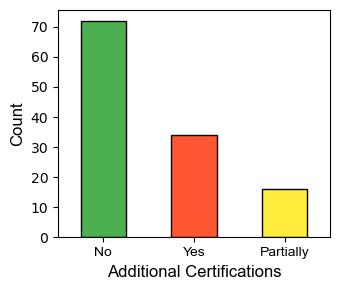

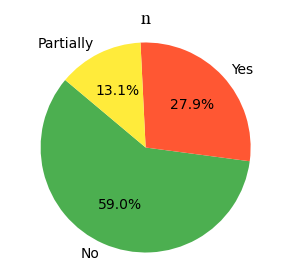

In [35]:
df.columns = df.columns.str.strip()

certifications_counts = df['additional certifications by degree?'].value_counts()
certifications_percentages = (certifications_counts / len(df) * 100).round(2)

certifications_summary = pd.DataFrame({
    'Additional Certifications': certifications_counts.index,
    'Count': certifications_counts.values,
    'Percentage (%)': certifications_percentages.values
})

print(certifications_summary)

certifications_colors = ['#4CAF50', '#FF5733', '#FFEB3B']  

fig, ax = plt.subplots(figsize=(3.5, 3))

certifications_summary.plot(kind='bar', x='Additional Certifications', y='Count', legend=False, color=certifications_colors, edgecolor='black', ax=ax)

plt.xlabel('Additional Certifications', fontsize=12, fontname="Arial")
plt.ylabel('Count', fontsize=12, fontname="Arial")
plt.title('', fontsize=14, fontname="Arial")
plt.xticks(rotation=0, fontsize=10, fontname="Arial")

plt.tight_layout()
plt.savefig('certifications.png', dpi=300)
plt.show()

plt.figure(figsize=(3.5, 3))
plt.pie(certifications_percentages, labels=certifications_counts.index, autopct='%1.1f%%', startangle=140, colors=certifications_colors)
plt.title('n', fontsize=14, fontname="Times New Roman")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.savefig('certifications-pie.png', dpi=300)
plt.show()

                 Missing Skill  Count  Percentage (%)
0             DevOps Practices     56            9.27
1      Artificial Intelligence     53            8.77
2   Cybersecurity Fundamentals     53            8.77
3                   Blockchain     50            8.28
4      Robotics and Automation     49            8.11
5                          AWS     45            7.45
6                        Azure     45            7.45
7              Cloud Computing     45            7.45
8                     Big Data     41            6.79
9                       Hadoop     41            6.79
10                       Spark     41            6.79
11                Data Science     40            6.62


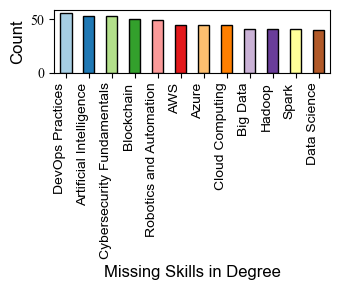

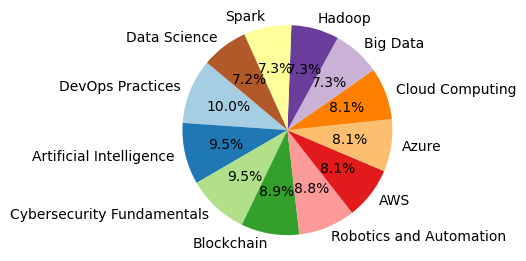

In [39]:
df.columns = df.columns.str.strip()

skills_series = df['missing skills in degree?'].dropna().str.split(',')

skills_flat = [skill.strip() for sublist in skills_series for skill in sublist]

skills_df = pd.DataFrame(skills_flat, columns=['Missing Skill'])

skills_df['Missing Skill'] = skills_df['Missing Skill'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

skills_df['Missing Skill'] = skills_df['Missing Skill'].apply(lambda x: ' '.join(x.split()[:2]) if len(x.split()) > 3 else x)

skills_count = skills_df['Missing Skill'].value_counts()
skills_percentage = (skills_count / len(skills_flat) * 100).round(2)

skills_summary = pd.DataFrame({
    'Missing Skill': skills_count.index,
    'Count': skills_count.values,
    'Percentage (%)': skills_percentage.values
})

top_skills_summary = skills_summary.head(12)

print(top_skills_summary)

skills_colors = plt.cm.Paired.colors  

fig, ax = plt.subplots(figsize=(3.5, 3))

top_skills_summary.plot(kind='bar', x='Missing Skill', y='Count', legend=False,
                        color=skills_colors[:len(top_skills_summary)], edgecolor='black', ax=ax)

plt.xlabel('Missing Skills in Degree', fontsize=12, fontname="Arial")
plt.ylabel('Count', fontsize=12, fontname="Arial")
plt.title('', fontsize=14, fontname="Arial")
plt.xticks(rotation=90, ha="right", fontsize=10, fontname="Arial")  
plt.yticks(fontsize=10, fontname="Times New Roman")

plt.tight_layout()
plt.savefig('missing-skills1.png', dpi=300)
plt.show()

plt.figure(figsize=(3.5, 3))
plt.pie(top_skills_summary['Percentage (%)'], labels=top_skills_summary['Missing Skill'], autopct='%1.1f%%',
        startangle=140, colors=skills_colors[:len(top_skills_summary)])
plt.title('', fontsize=14, fontname="Arial")
plt.axis('equal')  
plt.savefig('missing-skills2.png', dpi=300)
plt.show()